<h1>Feature Engineering</h1>
<hr>

In [3]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

In [34]:
#import dataset
df=pd.read_csv("project_files/cleaned_listings.csv")

<h1>Co-relations in the dataset</h1>

In [8]:
correlations = df.loc[:, ~df.columns.isin(['id'])].corr()

In [10]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

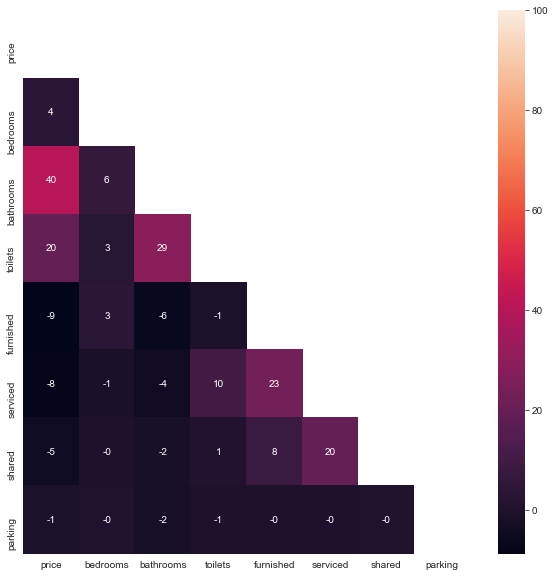

In [15]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [16]:
correlations = df.loc[(df['category']=='For Sale')].loc[:, ~df.columns.isin(['id'])].corr()

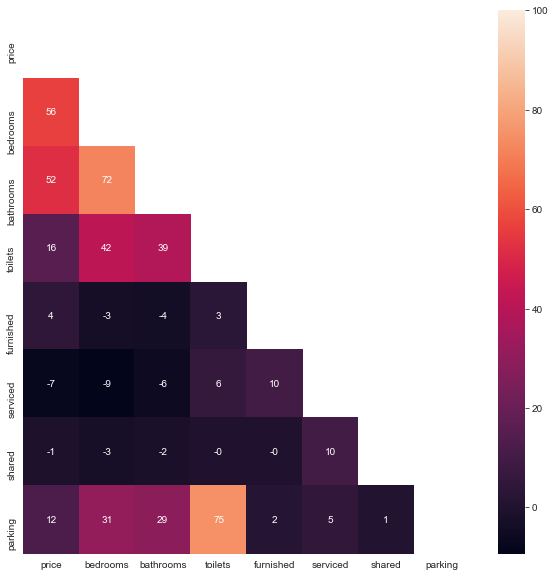

In [17]:
#correlation in properties listed for sale
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [18]:
correlations = df.loc[(df['category']=='For Rent')].loc[:, ~df.columns.isin(['id'])].corr()

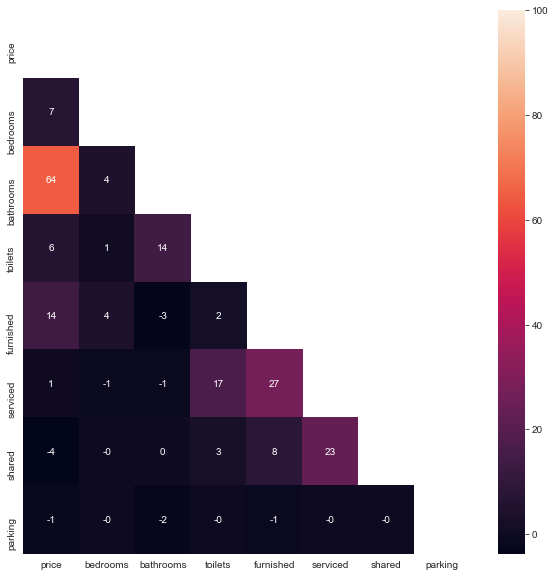

In [19]:
#correlation in properties listed for sale
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [23]:
df.shape

(9077, 17)

In [22]:
df.loc[(df['sub_locality']=='Missing')].shape

(8482, 17)

In [2]:
#create a value for pre covid years
# df2['pre_covid']=df[(df['listdate'] < '2020-3-12') ].astype(int)
df['pre_covid']=( (df.listdate <= "2020-3-12")).astype(int)

NameError: name 'df' is not defined

In [1]:
#27th dec 2021 from the covid graph
df['post_covid']=((df.listdate>="2021-12-27")).astype(int)

NameError: name 'df' is not defined